In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Utils
import ML
from Utils import zscore_normalize_features
from sklearn.preprocessing import StandardScaler

2.Lectura de datos

In [106]:
kartRecord = pd.read_csv('data/Kart2.csv')
display(kartRecord)

,ray1,ray2,ray3,ray4,ray5,kartx,karty,kartz,time,action
0,-1.0,6.521043,4.611090,6.489725,4.588912,15.98893,0.275615,3.105009,0.373333,NONE
1,-1.0,6.520910,4.611073,6.489857,4.588929,15.98893,0.275714,3.105008,0.433952,NONE
2,-1.0,6.520908,4.611071,6.489859,4.588931,15.98893,0.275727,3.105008,0.453257,NONE
3,-1.0,6.520905,4.611069,6.489862,4.588933,15.98893,0.275732,3.105008,0.465425,NONE
4,-1.0,6.520902,4.611067,6.489864,4.588934,15.98893,0.275744,3.105008,0.513547,NONE
...,...,...,...,...,...,...,...,...,...,...
244,-1.0,7.639052,5.240210,5.443144,3.963899,15.35748,0.279180,27.426280,24.503820,NONE
245,-1.0,7.685861,5.272271,5.399075,3.931840,15.32558,0.279183,28.494010,24.601670,NONE
246,-1.0,7.735830,5.306497,5.352030,3.897616,15.29168,0.279187,29.628620,24.714140,NONE
247,-1.0,7.770543,5.330274,5.319351,3.873841,15.26649,0.279190,30.471240,24.804520,NONE


,action
0,NONE
1,NONE
2,NONE
3,NONE
4,NONE
...,...
244,NONE
245,NONE
246,NONE
247,NONE


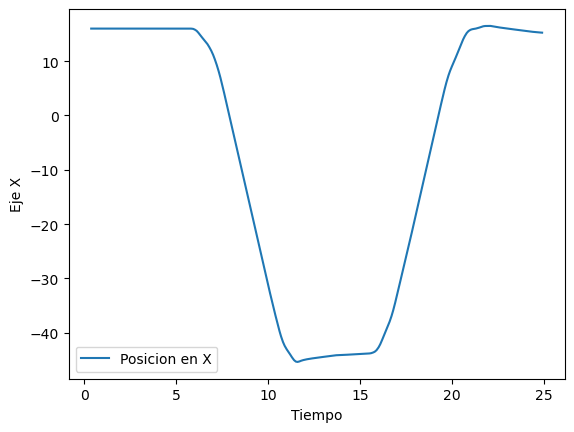

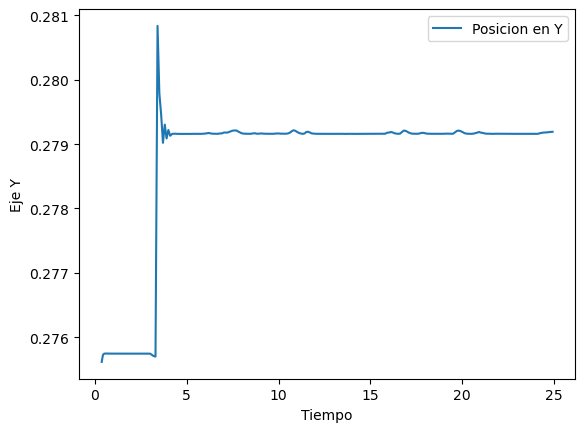

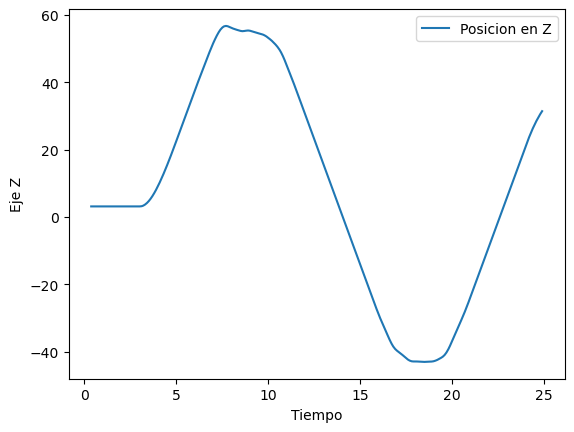

In [107]:
output = kartRecord[['action']]
display(output)
kartRecord = kartRecord.drop(['action'], axis=1)
plt.plot(kartRecord['time'], kartRecord['kartx'], label='Posicion en X')
plt.xlabel("Tiempo")
plt.ylabel("Eje X")
plt.legend()

plt.show()

plt.plot(kartRecord['time'], kartRecord['karty'], label='Posicion en Y')
plt.xlabel("Tiempo")
plt.ylabel("Eje Y")
plt.legend()

plt.show()

plt.plot(kartRecord['time'], kartRecord['kartz'], label='Posicion en Z')
plt.xlabel("Tiempo")
plt.ylabel("Eje Z")
plt.legend()

plt.show()

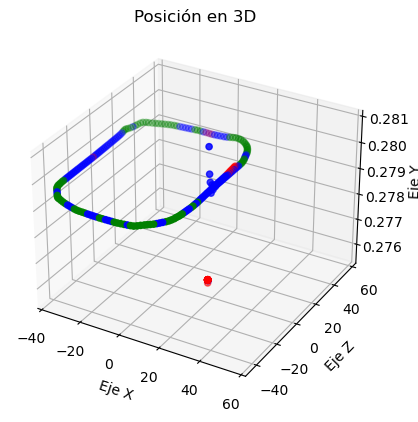

In [108]:
# Crear un diccionario de colores para cada categoría
color_dict = {'NONE': 'red', 'ACCELERATE': 'blue', 'LEFT_ACCELERATE': 'green', 'RIGHT_ACCELERATE': 'purple'}

# Mapear las categorías a colores utilizando map
colors = output['action'].map(color_dict)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(kartRecord['kartx'], kartRecord['kartz'], kartRecord['karty'], label='Posicion del kart en el cada instante',c=colors)

# Ajustamos el rango del eje X a representar para mantener la proporcion.
# Asi la grafica corresponde al recorrido "real" del kart
ax.set_xlim(-40,60)

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Z')
ax.set_zlabel('Eje Y')
ax.set_title('Posición en 3D')

plt.show()

3.Limpieza ,normalización , one-hot encoding

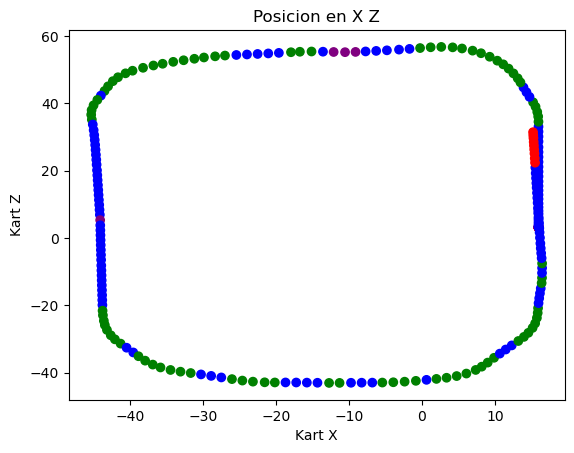

In [109]:
positions_fig, positions_ax = plt.subplots()
scatter = positions_ax.scatter(kartRecord['kartx'], kartRecord['kartz'], c=colors)
positions_ax.set_xlabel('Kart X')
positions_ax.set_ylabel('Kart Z')
positions_ax.set_title('Posicion en X Z')



plt.show()


In [110]:
#Se quita el tiempo porque no es relevante y la posición y porque corre en un plano
kartRecord = kartRecord.drop('karty', axis = 1)
kartRecord = kartRecord.drop('time', axis = 1)
#normalize_data = kartRecord.columns
#values= kartRecord[normalize_data]

# Inicializar el StandardScaler
#scaler = StandardScaler()

# Ajustar el scaler y transformar las características
#normalized_features = scaler.fit_transform(values)

# Reemplazar las características originales con las normalizadas en el DataFrame
#kartRecord[normalize_data] = normalized_features
#display(kartRecord)

Xnorm,muX,sigmaX = zscore_normalize_features(kartRecord['kartx'])
kartRecord['kartx']=Xnorm
Znorm,muZ,sigmaZ = zscore_normalize_features(kartRecord['kartz'])
kartRecord['kartz']=Znorm

ray1norm,muray1,sigmaray1 = zscore_normalize_features(kartRecord['ray1'])
kartRecord['ray1']=ray1norm
ray2norm,muray2,sigmaray2 = zscore_normalize_features(kartRecord['ray2'])
kartRecord['ray2']=ray2norm
ray3norm,muray3,sigmaray3 = zscore_normalize_features(kartRecord['ray3'])
kartRecord['ray3']=ray3norm
ray4norm,muray4,sigmaray4 = zscore_normalize_features(kartRecord['ray4'])
kartRecord['ray4']=ray4norm
ray5norm,muray5,sigmaray5 = zscore_normalize_features(kartRecord['ray5'])
kartRecord['ray5']=ray5norm

In [111]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output = False)
output_encoded = onehot_encoder.fit_transform(output)

output_encoded = pd.DataFrame(output_encoded,columns=onehot_encoder.get_feature_names_out(['action']))
complete_stats = pd.concat([kartRecord,output_encoded] , axis = 1)

display(complete_stats)

,ray1,ray2,ray3,ray4,ray5,kartx,kartz,action_ACCELERATE,action_LEFT_ACCELERATE,action_NONE,action_RIGHT_ACCELERATE
0,-0.204017,0.435506,0.352724,0.493962,0.411848,0.906369,-0.144256,0.0,0.0,1.0,0.0
1,-0.204017,0.435456,0.352714,0.494009,0.411857,0.906369,-0.144256,0.0,0.0,1.0,0.0
2,-0.204017,0.435455,0.352713,0.494010,0.411858,0.906369,-0.144256,0.0,0.0,1.0,0.0
3,-0.204017,0.435454,0.352712,0.494011,0.411859,0.906369,-0.144256,0.0,0.0,1.0,0.0
4,-0.204017,0.435453,0.352711,0.494011,0.411860,0.906369,-0.144256,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
244,-0.204017,0.854695,0.722972,0.124019,0.085138,0.881503,0.626635,0.0,0.0,1.0,0.0
245,-0.204017,0.872245,0.741841,0.108441,0.068379,0.880247,0.660478,0.0,0.0,1.0,0.0
246,-0.204017,0.890981,0.761983,0.091812,0.050490,0.878912,0.696441,0.0,0.0,1.0,0.0
247,-0.204017,0.903996,0.775977,0.080261,0.038062,0.877920,0.723148,0.0,0.0,1.0,0.0


4.

In [112]:
from sklearn.model_selection import train_test_split
output_array = output['action'].ravel()
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(kartRecord, output_array, test_size=0.2, random_state=42)

iters = 10000
alpha= 0.2
learnrate = 0.1
y_entrenamiento_encoded = onehot_encoder.fit_transform(y_entrenamiento.reshape(-1,1))

num_capas_neurona = [7,5,len(y_entrenamiento_encoded[1])]
thetas=ML.gradientDescentTraining(num_capas_neurona,X_entrenamiento,y_entrenamiento_encoded,learnrate,alpha,iters)
a,z = ML.feedforward(thetas, X_prueba)
p = ML.predict(thetas,X_prueba)
y_prueba_encoded = onehot_encoder.fit_transform(y_prueba.reshape(-1, 1))
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
my_cm = confusion_matrix(np.argmax(y_prueba_encoded, axis=1),p)
my_acc = np.trace(my_cm)/my_cm.sum() * 100

mse = mean_squared_error(np.argmax(y_prueba_encoded, axis=1),p)
print(f"My accuracy: {my_acc}%")
print("My confussion Matrix\n",my_cm)
print("My MSE:", mse)




My accuracy: 57.99999999999999%
My confussion Matrix
 [[13  5  0]
 [ 7 15  0]
 [ 9  0  1]]
My MSE: 0.96
